# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

For (α, σ) = (0.25, 0.50):    HF = 3.00, HM = 5.50, HF/HM: 0.55
For (α, σ) = (0.50, 0.50):    HF = 4.50, HM = 4.50, HF/HM: 1.00
For (α, σ) = (0.75, 0.50):    HF = 5.50, HM = 3.00, HF/HM: 1.83
For (α, σ) = (0.25, 1.00):    HF = 2.00, HM = 6.50, HF/HM: 0.31
For (α, σ) = (0.50, 1.00):    HF = 4.50, HM = 4.50, HF/HM: 1.00
For (α, σ) = (0.75, 1.00):    HF = 6.50, HM = 2.00, HF/HM: 3.25
For (α, σ) = (0.25, 1.50):    HF = 1.50, HM = 7.00, HF/HM: 0.21
For (α, σ) = (0.50, 1.50):    HF = 4.50, HM = 4.50, HF/HM: 1.00
For (α, σ) = (0.75, 1.50):    HF = 7.00, HM = 1.50, HF/HM: 4.67


NameError: name 'list_sigmas' is not defined

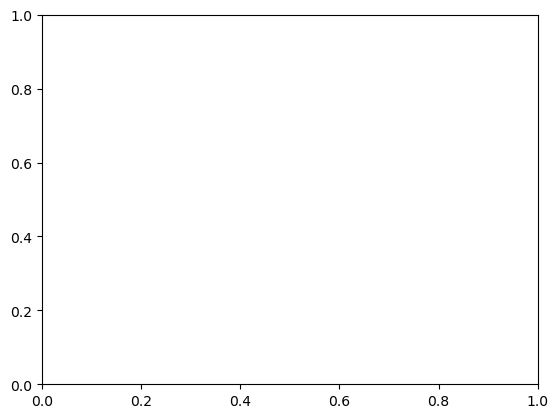

In [4]:
from inauguralproject import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

alpha_values = [ 0.25, 0.5, 0.75]
sigma_values = [ 0.5, 1.0, 1.5]
res = {}

#Discrete solving for every combination of alpha and sigma:
for sigma in sigma_values:
    model.par.sigma = sigma
    for alpha in alpha_values:
        model.par.alpha = alpha
        opt = model.solve_discrete()
        #Saving results
        HFHM_ratio = opt.HF/opt.HM
        res[(alpha, sigma)] = HFHM_ratio
        
        #Printing results
        print(f'For (\u03b1, \u03c3) = ({model.par.alpha:.2f}, {model.par.sigma:.2f}):    HF = {opt.HF:.2f}, HM = {opt.HM:.2f}, HF/HM: {HFHM_ratio:.2f}')

#Plotting HF/HM on alpha for every valye of sigma:
fig, ax = plt.subplots()
for sigma in list_sigmas:
    y = [res[(alpha, sigma)] for alpha in list_alphas]
    ax.plot(list_alphas, y, label=f"$\u03c3$ = {sigma}")
ax.set_xlabel("$\u03b1$")
ax.set_ylabel("$H_F/H_M$")
ax.legend()
plt.show()

# Question 2

Explain your code and procedure

In [3]:
# code

# Question 3

Explain your code and procedure

LM = 5.915418152906182, HM = 4.047073957614048, LF = 2.92714458042745, LH = 5.078644101837556 
LM = 4.56019764929832, HM = 4.486684528000424, LF = 4.41381422740502, LH = 4.4873896459354725 
LM = 4.4549516045985085, HM = 4.454951615848662, LF = 4.454951604598509, LH = 4.454951617539919 
LM = 4.351062157974178, HM = 4.415056485829407, LF = 4.478392284603656, LH = 4.414444919688965 
LM = 3.2912934161307588, HM = 4.534141423063261, LF = 5.388722425825322, LH = 4.206471460320629 
[ 2.27050176e-01  1.57145556e-04  3.79635212e-10 -1.38527899e-04
 -7.50115800e-02]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


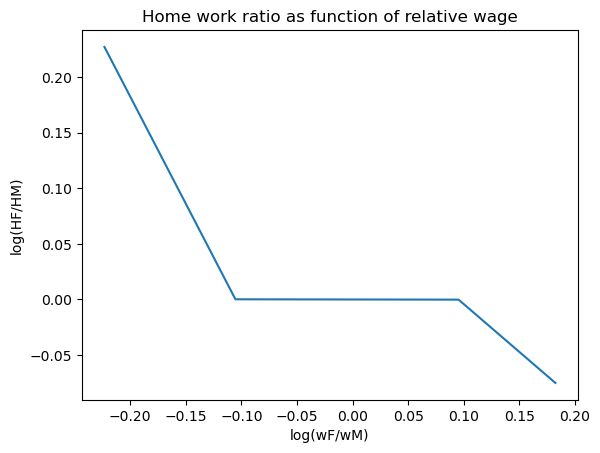

In [9]:
#set paramenters

model.par.wF = 1
model.par.sigma = 1
model.par.alpha = 0.5
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]
# model.solve()
results_w_workratio = np.empty(5)
results_w_wageratio = np.empty(5)

for i, wF in enumerate(wF_values):
    model.par.wF = wF
    opt = model.solve()
    results_w_workratio[i] = np.log(opt.HF/opt.HM)
    results_w_wageratio[i] = np.log(model.par.wF/model.par.wM)
    print(f'LM = {opt.LM}, HM = {opt.HM}, LF = {opt.LF}, LH = {opt.HF} ')

print(results_w_workratio)
print(results_w_wageratio)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(results_w_wageratio, results_w_workratio)
ax.set_title('Home work ratio as function of relative wage')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)');



ADD CONCISE CONLUSION.